Información del dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Año          583 non-null    int64 
 1   Sector       583 non-null    object
 2   Colegio      583 non-null    object
 3   Código DANE  583 non-null    int64 
 4   Indicador    583 non-null    object
 5   Resultado    583 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 27.5+ KB
None
Primeras filas del dataset
    Año   Sector                       Colegio   Código DANE  \
0  2016  Público  I.E. Adelaida Correa Estrada  105631000050   
1  2016  Público  I.E. Adelaida Correa Estrada  105631000050   
2  2016  Público  I.E. Adelaida Correa Estrada  105631000050   
3  2016  Público  I.E. Adelaida Correa Estrada  105631000050   
4  2016  Público  I.E. Adelaida Correa Estrada  105631000050   

                               Indicador  Resultado  
0         Establecimie

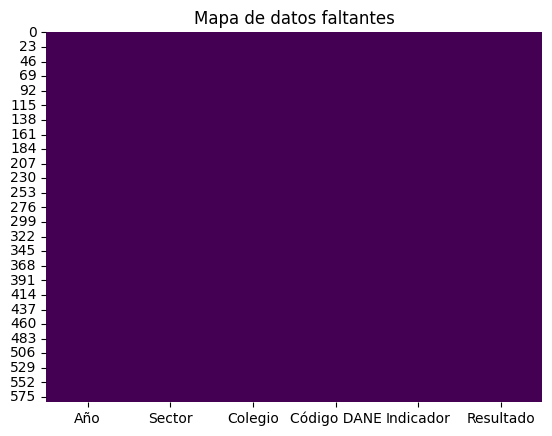

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar archivo CSV
df = pd.read_csv("ResultadosSabanetaSaber11.csv")

# Información básica
print("Información del dataset")
print(df.info())
print("Primeras filas del dataset")
print(df.head())
print("Resumen estadístico del dataset")
print(df.describe())

# Valores faltantes
print("\nValores faltantes por columna:")
print(df.isnull().sum())

# Visualización de nulos
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Mapa de datos faltantes")
plt.show()

import matplotlib.pyplot as plt

# Lista de variables categóricas y títulos para los gráficos



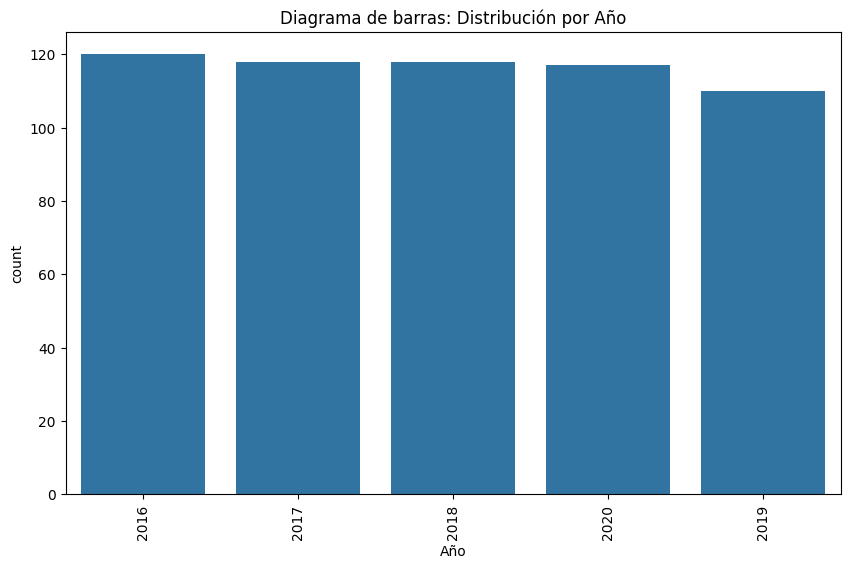

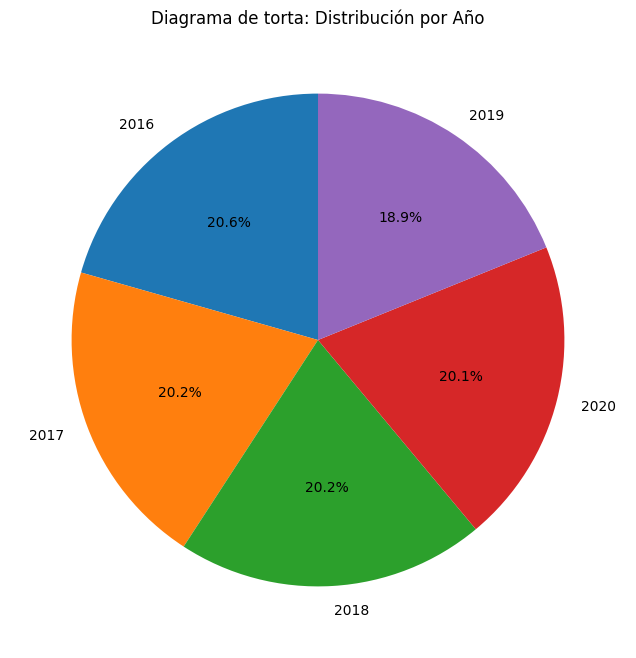

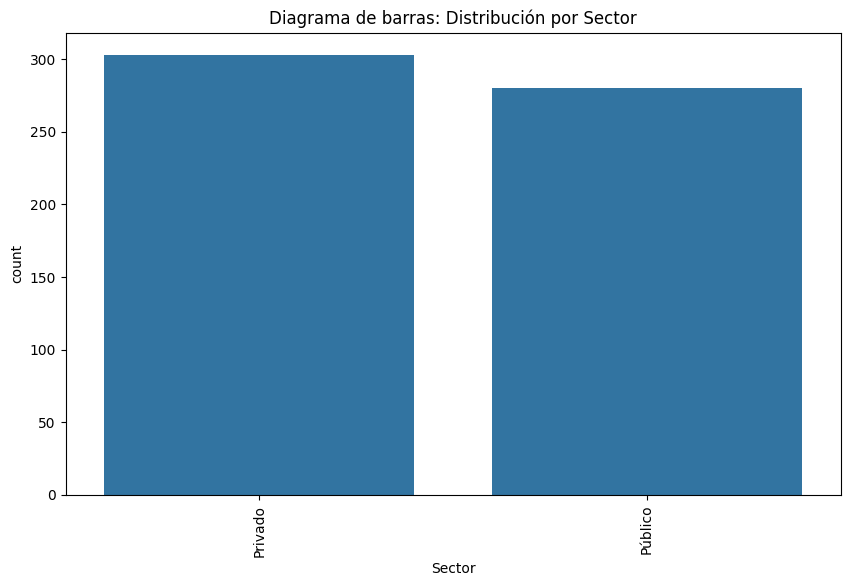

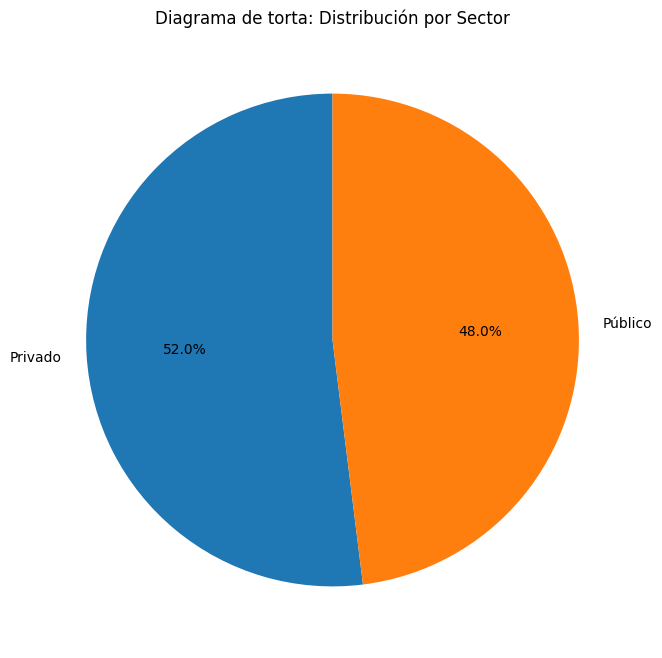

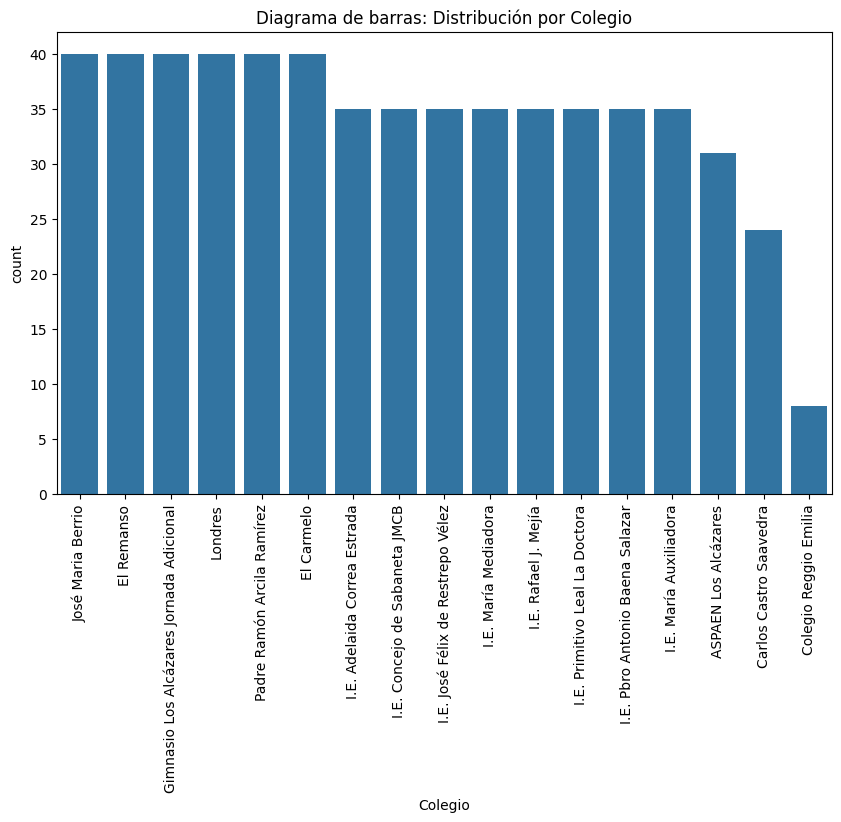

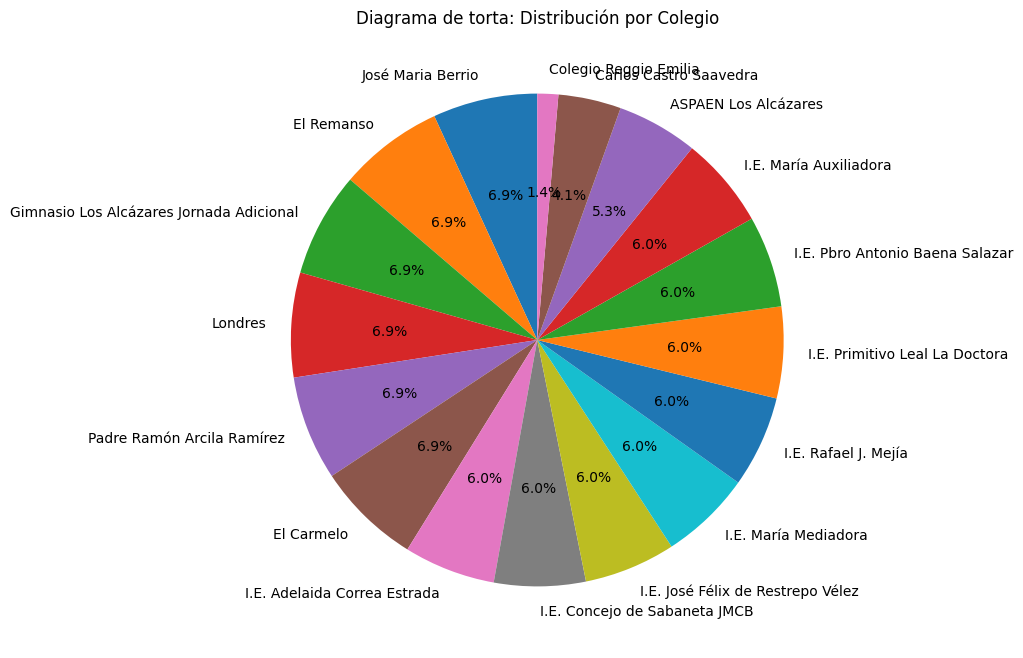

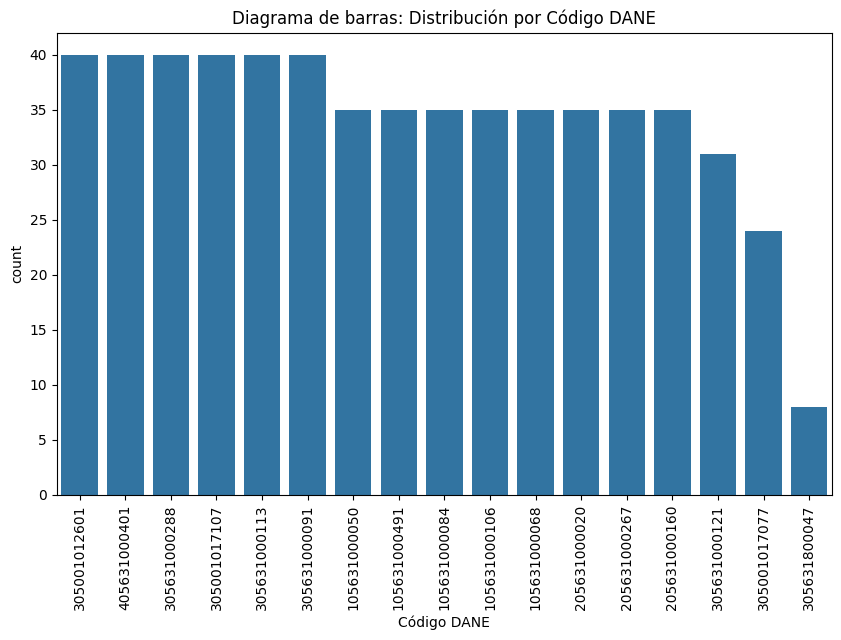

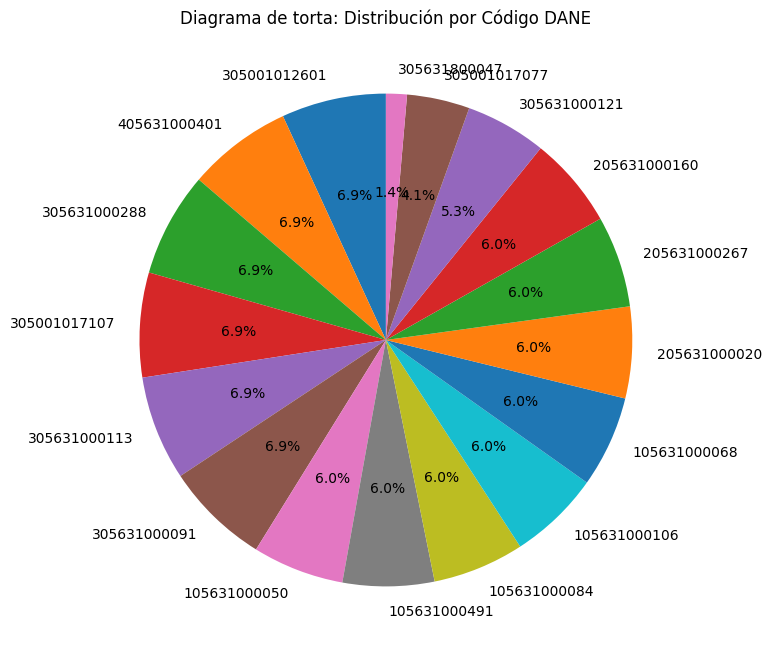

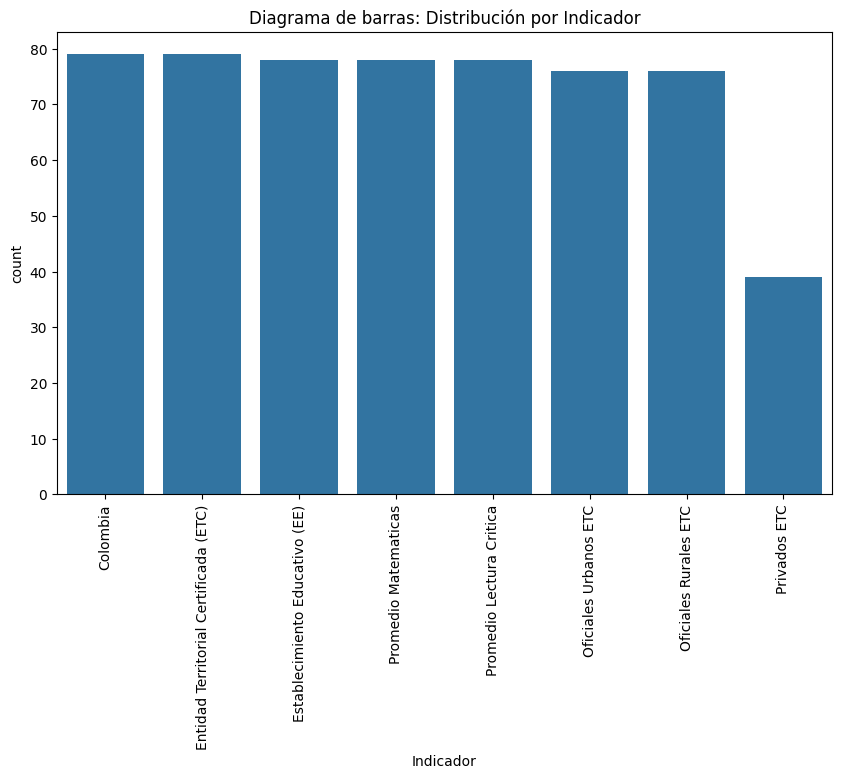

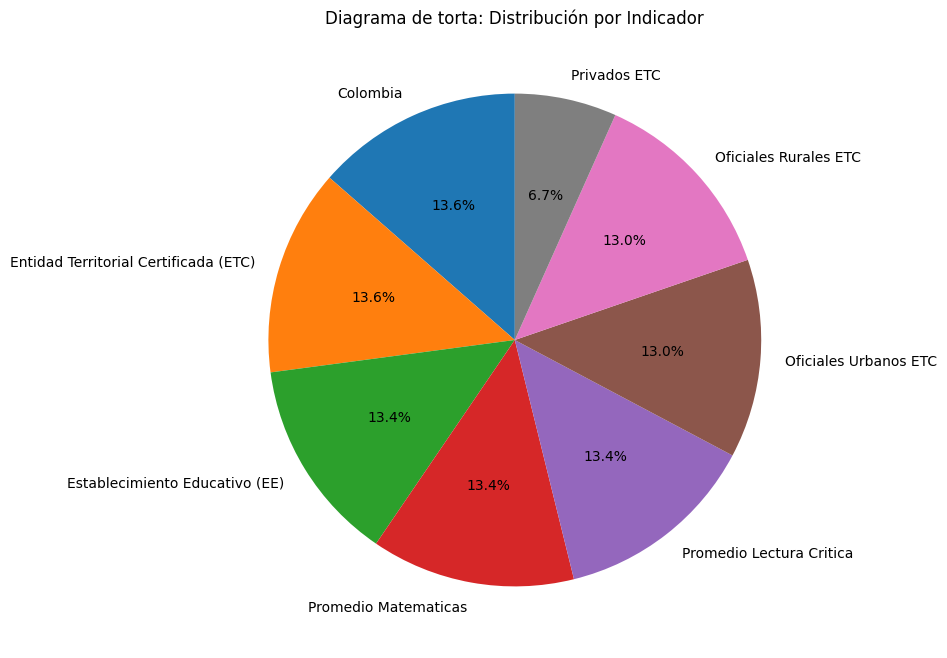

In [25]:
categorical_vars = ['Año', 'Sector', 'Colegio', 'Código DANE', 'Indicador']
titles = {
    'Año': 'Distribución por Año',
    'Sector': 'Distribución por Sector',
    'Colegio': 'Distribución por Colegio',
    'Código DANE': 'Distribución por Código DANE',
    'Indicador': 'Distribución por Indicador'
}

for var in categorical_vars:
    # Diagrama de barras
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=var, order=df[var].value_counts().index)
    plt.title(f'Diagrama de barras: {titles[var]}')
    plt.xticks(rotation=90)
    plt.show()

    # Diagrama de torta
    plt.figure(figsize=(8, 8))
    df[var].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
    plt.title(f'Diagrama de torta: {titles[var]}')
    plt.ylabel('')
    plt.show()

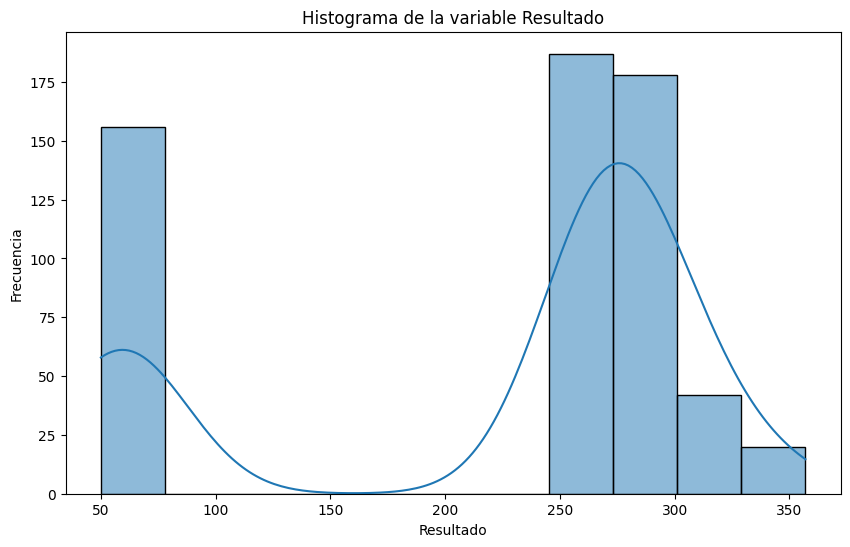

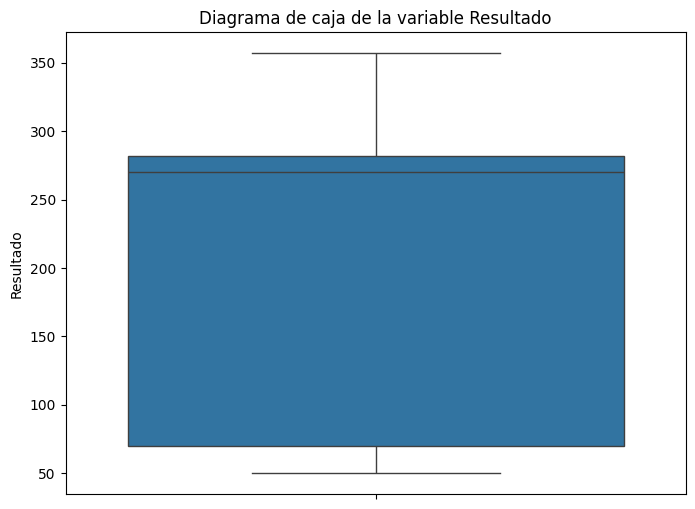

In [26]:
# Histograma para la variable 'Resultado'
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Resultado', kde=True)
plt.title('Histograma de la variable Resultado')
plt.xlabel('Resultado')
plt.ylabel('Frecuencia')
plt.show()

# Diagrama de caja para la variable 'Resultado'
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='Resultado')
plt.title('Diagrama de caja de la variable Resultado')
plt.ylabel('Resultado')
plt.show()

In [27]:
# Calculate the IQR for each numerical column
numerical_cols = df.select_dtypes(include=np.number).columns
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify and remove outliers
df_no_outliers = df[~((df[numerical_cols] < lower_bound) | (df[numerical_cols] > upper_bound)).any(axis=1)]

print("DataFrame original con valores atípicos:")
display(df)

print("\nDataFrame sin valores atípicos:")
display(df_no_outliers)

DataFrame original con valores atípicos:


,Año,Sector,Colegio,Código DANE,Indicador,Resultado
0,2016,Público,I.E. Adelaida Correa Estrada,105631000050,Establecimiento Educativo (EE),285
1,2016,Público,I.E. Adelaida Correa Estrada,105631000050,Colombia,264
2,2016,Público,I.E. Adelaida Correa Estrada,105631000050,Entidad Territorial Certificada (ETC),295
3,2016,Público,I.E. Adelaida Correa Estrada,105631000050,Oficiales Urbanos ETC,282
4,2016,Público,I.E. Adelaida Correa Estrada,105631000050,Oficiales Rurales ETC,272
...,...,...,...,...,...,...
578,2020,Privado,Colegio Reggio Emilia,305631800047,Oficiales Urbanos ETC,270
579,2020,Privado,Colegio Reggio Emilia,305631800047,Oficiales Rurales ETC,269
580,2020,Privado,Colegio Reggio Emilia,305631800047,Privados ETC,309
581,2020,Privado,Colegio Reggio Emilia,305631800047,Promedio Matematicas,61



DataFrame sin valores atípicos:


,Año,Sector,Colegio,Código DANE,Indicador,Resultado
0,2016,Público,I.E. Adelaida Correa Estrada,105631000050,Establecimiento Educativo (EE),285
1,2016,Público,I.E. Adelaida Correa Estrada,105631000050,Colombia,264
2,2016,Público,I.E. Adelaida Correa Estrada,105631000050,Entidad Territorial Certificada (ETC),295
3,2016,Público,I.E. Adelaida Correa Estrada,105631000050,Oficiales Urbanos ETC,282
4,2016,Público,I.E. Adelaida Correa Estrada,105631000050,Oficiales Rurales ETC,272
...,...,...,...,...,...,...
578,2020,Privado,Colegio Reggio Emilia,305631800047,Oficiales Urbanos ETC,270
579,2020,Privado,Colegio Reggio Emilia,305631800047,Oficiales Rurales ETC,269
580,2020,Privado,Colegio Reggio Emilia,305631800047,Privados ETC,309
581,2020,Privado,Colegio Reggio Emilia,305631800047,Promedio Matematicas,61


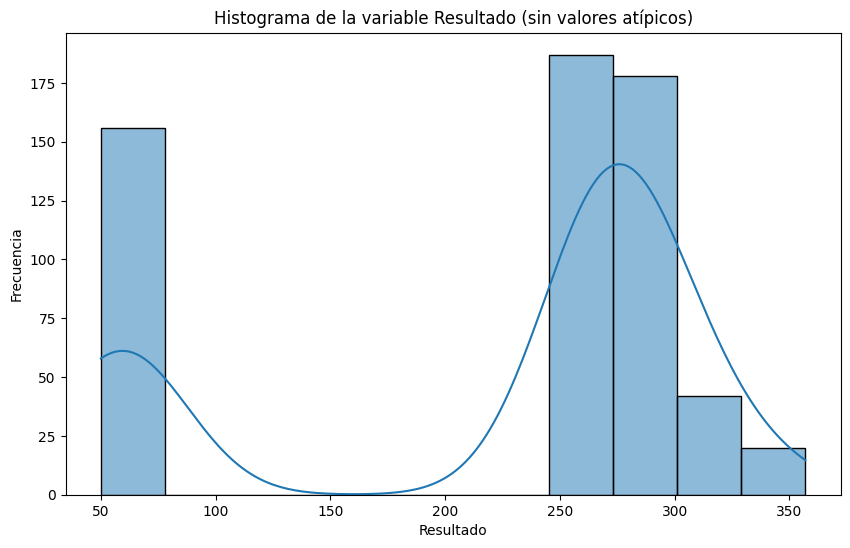

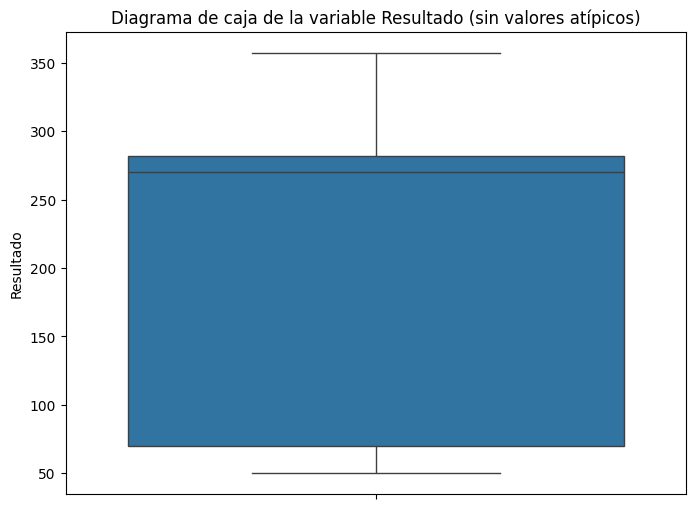

In [28]:
# Histograma para la variable 'Resultado' sin valores atípicos
plt.figure(figsize=(10, 6))
sns.histplot(data=df_no_outliers, x='Resultado', kde=True)
plt.title('Histograma de la variable Resultado (sin valores atípicos)')
plt.xlabel('Resultado')
plt.ylabel('Frecuencia')
plt.show()

# Diagrama de caja para la variable 'Resultado' sin valores atípicos
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_no_outliers, y='Resultado')
plt.title('Diagrama de caja de la variable Resultado (sin valores atípicos)')
plt.ylabel('Resultado')
plt.show()

Shapiro-Wilk Test: Statistic=0.7180, p-value=0.0000
Kolmogorov-Smirnov Test: Statistic=1.0000, p-value=0.0000
Anderson-Darling Test: Statistic=80.5745
  At 15.0% significance level, the data does not look normal (critical value 0.5720)
  At 10.0% significance level, the data does not look normal (critical value 0.6520)
  At 5.0% significance level, the data does not look normal (critical value 0.7820)
  At 2.5% significance level, the data does not look normal (critical value 0.9120)
  At 1.0% significance level, the data does not look normal (critical value 1.0850)
Jarque-Bera Test: Statistic=105.4944, p-value=0.0000


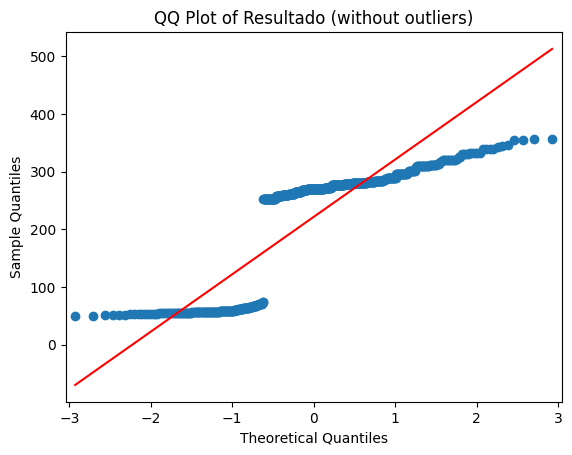

In [29]:
from scipy import stats
import statsmodels.api as sm

# Shapiro-Wilk test
shapiro_test = stats.shapiro(df_no_outliers['Resultado'])
print(f"Shapiro-Wilk Test: Statistic={shapiro_test.statistic:.4f}, p-value={shapiro_test.pvalue:.4f}")

# Kolmogorov-Smirnov test
ks_test = stats.kstest(df_no_outliers['Resultado'], 'norm')
print(f"Kolmogorov-Smirnov Test: Statistic={ks_test.statistic:.4f}, p-value={ks_test.pvalue:.4f}")

# Anderson-Darling test
ad_test = stats.anderson(df_no_outliers['Resultado'], dist='norm')
print(f"Anderson-Darling Test: Statistic={ad_test.statistic:.4f}")
for i in range(len(ad_test.critical_values)):
    sl, cv = ad_test.significance_level[i], ad_test.critical_values[i]
    if ad_test.statistic < cv:
        print(f"  At {sl}% significance level, the data looks normal (critical value {cv:.4f})")
    else:
        print(f"  At {sl}% significance level, the data does not look normal (critical value {cv:.4f})")

# Jarque-Bera test
jb_test = stats.jarque_bera(df_no_outliers['Resultado'])
print(f"Jarque-Bera Test: Statistic={jb_test.statistic:.4f}, p-value={jb_test.pvalue:.4f}")

# QQ Plot
sm.qqplot(df_no_outliers['Resultado'], line='s')
plt.title('QQ Plot of Resultado (without outliers)')
plt.show()